In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob, os
from astropy.io import fits
import numpy as np

In [3]:
import observations
reload(observations)

disperse/polyclip_c.pyc
disperse


<module 'observations' from 'observations.pyc'>

<h3>Define what we want...</h3>

In [4]:
config = "/Users/npirzkal/Dropbox/GRISMDATA/NIRCAM/NIRCAM_R.conf"
DIRFILTER = "F430M"
passband = "/Users/npirzkal/Dropbox/NIRCAM/DATA/%s_passband.dat" % (DIRFILTER)
passband = "/Users/npirzkal/Dropbox/NIRCAM/DATA/%s_FM.xlsx_filteronly_modA_sorted.txt" % (DIRFILTER)

<h3>Get a list of images:</h3>

In [5]:
image_names = glob.glob("/Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_*_GrismDirectImage_elec_per_sec.fits")

<h3> Create a simple segmentation image.. 0 or 1</h3>

In [6]:
d = fits.open(image_names[0])[1].data
seg_data = d * 1. - 10.
seg_data[seg_data<.3] = 0


<h3> Set things up</h3>

In [7]:
this_one = observations.observation(image_names,seg_data,config,passband=passband,passband_unit="mu",order="+1")

/Users/npirzkal/anaconda/lib/python2.7/site-packages/astropy/table/table.py:2424: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  result = self.as_array() == other


2389 pixels to process
Loaded /Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_F090W_GrismDirectImage_elec_per_sec.fits wavelength: 9000.0 A
Loaded /Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_F182M_GrismDirectImage_elec_per_sec.fits wavelength: 18200.0 A
Loaded /Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_F210M_GrismDirectImage_elec_per_sec.fits wavelength: 21000.0 A
Loaded /Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_F300M__GrismDirectImage_elec_per_sec.fits wavelength: 30000.0 A
Loaded /Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_F360M_GrismDirectImage_elec_per_sec.fits wavelength: 36000.0 A
Loaded /Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_F410M_GrismDirectImage_elec_per_sec.fits wavelength: 41000.0 A
Loaded /Users/npirzkal/Dropbox/NIRCAM/bryan_sim/sim_A1_F480M_GrismDirectImage_elec_per_sec.fits wavelength: 48000.0 A


In [8]:
this_one.disperse()

observations.py:117: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  simulated_image[miny:maxy+1,minx:maxx+1] = simulated_image[miny:maxy+1,minx:maxx+1] + a


17.1597988605 s.


100%|############################################################|Time: 0:00:17


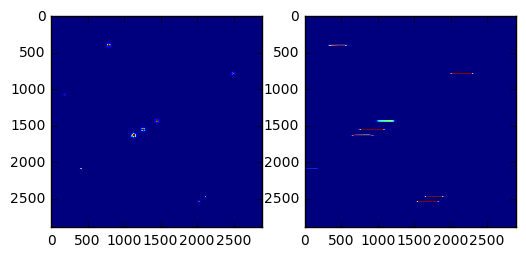

In [9]:
plt.subplot(1,2,1)
im = plt.imshow(d)
im.set_clim(0,10)
plt.subplot(1,2,2)
im = plt.imshow(this_one.simulated_image)
im.set_clim(0,1000)